# Analysis on yahoo adjustmet close prices

## Initialization
The project initialization

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

### Set paths to data folders

In [2]:
dir_data_raw = os.path.join('..', '..', 'data_raw')
dir_data_processing = os.path.join('..', '..', 'data_processing')

### Get tickers DF

_set a path to the tickers.csv file._

In [3]:
tickers_file = os.path.join(dir_data_processing, 'tickers', 'all_tickers.csv')

In [4]:
tickers_df = pd.read_csv(tickers_file)

In [5]:
tickers_df.head(3)

,ticker,ticker_index,ticker_yahoo,ticker_quandl
0,AAL,AAL_FTSE,AAL.L,LSE/AAL
1,ABF,ABF_FTSE,ABF.L,LSE/ABF
2,ACA,ACA_CAC,ACA.PA,EURONEXT/ACA


### Set thresholds

In [6]:
max_daily_ratio = 1.4
min_daily_ratio = 0.6

anomalies for BAYN_DAX at 2013-07-15


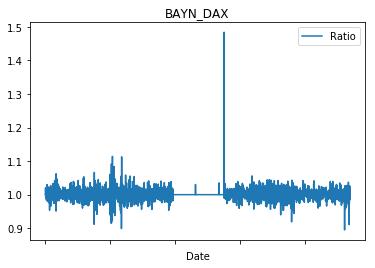

anomalies for CPI_FTSE at 2018-01-31


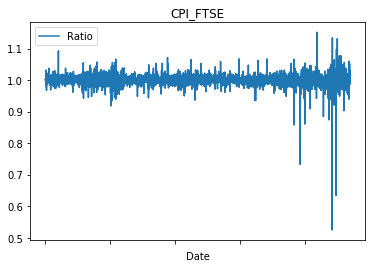

anomalies for DB1_DAX at 2007-06-11


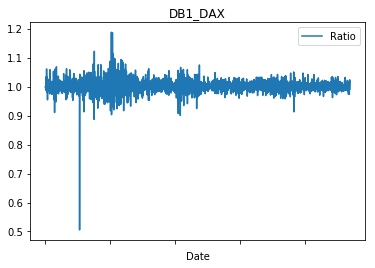

anomalies for IFX_DAX at 2008-12-04


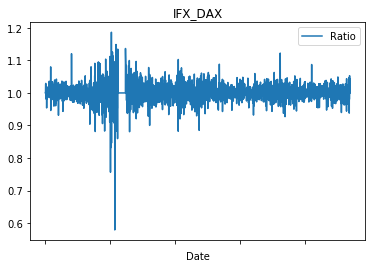

anomalies for LLOY_FTSE at 2009-01-28


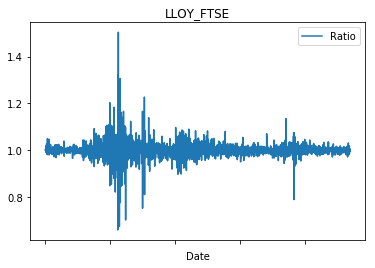

anomalies for MRO_FTSE at 2016-07-06


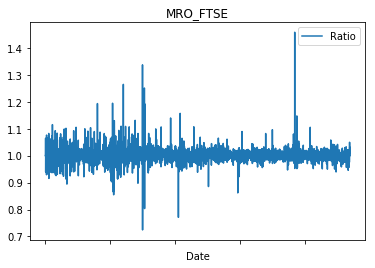

anomalies for RBS_FTSE at 2007-05-08
anomalies for RBS_FTSE at 2009-01-19


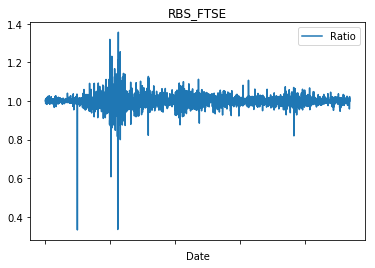

Total 7 noisy series


In [7]:
bad_prices = 0
for index, t in tickers_df.iterrows():
    price_file = os.path.join(dir_data_raw, 'prices', 'ready', "%s.csv" % t['ticker_index'])
    price_df = pd.read_csv(price_file)
    
    prev_day = None
    price_ratios = [1]
    show_flag = False
    for i, day in price_df.iterrows():
        if prev_day is None:
            prev_day = day
            continue
        day_ratio = day['Adj Close'] / prev_day['Adj Close'] 
        if day_ratio > max_daily_ratio or day_ratio < min_daily_ratio:
            show_flag = True
            print("anomalies for %s at %s" % (t['ticker_index'], day['Date']))
        price_ratios.append(day_ratio) 
        prev_day = day

            
    price_df['Ratio'] = pd.Series(price_ratios).values
    if show_flag:
        bad_prices += 1
        price_df.plot.line(x='Date', y='Ratio', title=t['ticker_index'])
        plt.show()
        
print("Total %s noisy series" % bad_prices)        